In [205]:
import sounddevice as sd
from scipy.io.wavfile import write
import IPython.display as ipd
import scipy.signal as sg
from IPython.display import Audio, display

import numpy as np


import sklearn
import librosa
import matplotlib.pyplot as plt
import librosa.display

%matplotlib inline

In [206]:
def recorder(outfile):
    fs = 44100  # Sample rate
    seconds = 3  # Duration of recording

    myrecording = sd.rec(int(seconds * fs), samplerate=fs, channels=2)
    sd.wait()  # Wait until recording is finished
    write(outfile, fs, myrecording)  # Save as WAV file     

In [207]:
ipd.Audio('Voices/levioza-origin.wav')

In [234]:
x_pos , sr_pos = librosa.load('Voices/james_bond/pos1.wav')
x_neg , sr_neg = librosa.load('Voices/james_bond/neg1.wav')
x_anc , sr_anc = librosa.load('Voices/james_bond/original.wav')

/home/nikalosa/.local/lib/python3.8/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/nikalosa/.local/lib/python3.8/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/nikalosa/.local/lib/python3.8/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


In [235]:
def waveplot(x, sr):
    plt.figure(figsize=(20, 5))
    librosa.display.waveplot(x, sr=sr)

In [245]:
def specto_plot(x, sr, name, y_axis='hz'):
    X = librosa.stft(x)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(20, 5))
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis=y_axis)
    plt.savefig(name)
    plt.colorbar()

In [246]:
def to_mfcc(x, sr):
    return librosa.feature.mfcc(x, sr=sr)


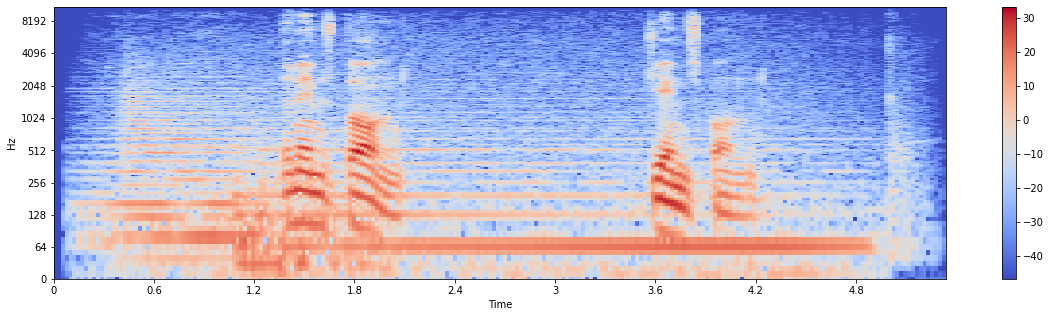

In [247]:
specto_plot(x_anc, sr_anc, 'orig.jpg','log')

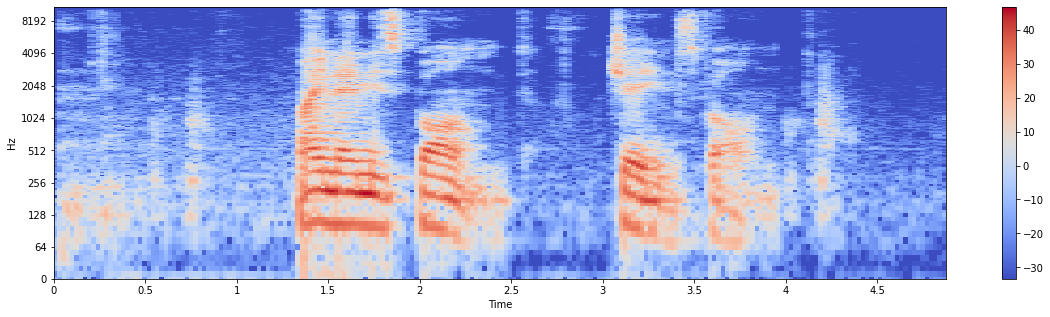

In [248]:
specto_plot(x_pos, sr_pos, 'pos.jpg', 'log')

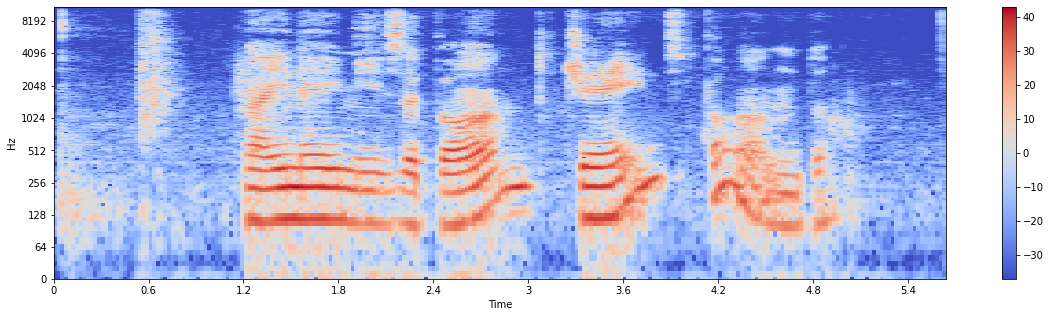

In [249]:
specto_plot(x_neg, sr_neg, 'neg.jpg', 'log')

In [221]:
mfcc_anc = to_mfcc(x_anc, sr_anc)
mfcc_pos = to_mfcc(x_pos, sr_pos)
mfcc_neg = to_mfcc(x_neg, sr_neg)

In [222]:
xsim_pos = librosa.segment.cross_similarity(mfcc_anc, mfcc_pos, metric='cosine')
xsim_neg = librosa.segment.cross_similarity(mfcc_anc, mfcc_neg, metric='cosine')

In [15]:
print(xsim_pos)

[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True False ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [False False  True ... False False False]
 [ True  True  True ...  True  True  True]]


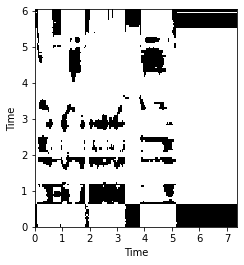

In [16]:
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
librosa.display.specshow(xsim_pos, x_axis='time', y_axis='time', hop_length=1024)

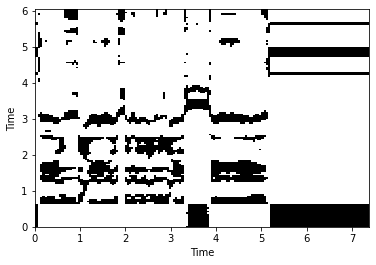

In [17]:
librosa.display.specshow(xsim_n eg, x_axis='time', y_axis='time', hop_length=1024)

## Filtering voice

In [18]:
def play(x, fr, autoplay=False):
    display(Audio(x, rate=fr, autoplay=autoplay))

In [19]:
play(x_anc, sr_anc)

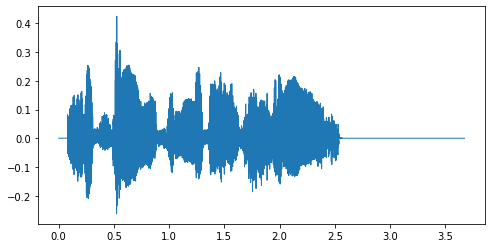

In [20]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
t = np.linspace(0., len(x_anc) / sr_anc, len(x_anc))
ax.plot(t, x_anc, lw=1)

In [21]:
def filter(x, sr, low, high):
    b, a = sg.butter(4, Wn=[2*low/sr, 2*high/sr], btype='band')
    x_fil = sg.filtfilt(b, a, x)
    play(x_fil, sr)
    fig, ax = plt.subplots(1, 1, figsize=(8, 4))
    ax.plot(t, x, lw=1)
    ax.plot(t, x_fil, lw=1)
    return x_fil, sr

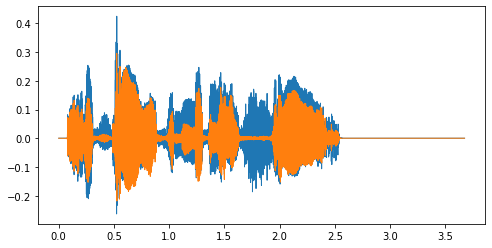

In [22]:
x_fil_anch, sr_anc = filter(x_anc, sr_anc, 300, 2000)

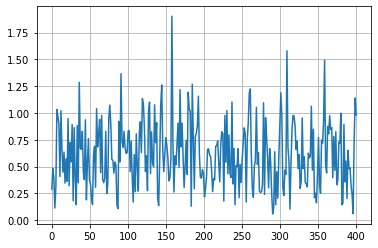

In [24]:
from scipy.fft import fft
# Number of sample points
N = 600
# sample spacing
T = 1.0 / 800.0
y = np.sin(50.0 * 2.0*np.pi*x_pos) + 0.5*np.sin(80.0 * 2.0*np.pi*x_pos)
yf = fft(y)
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)
import matplotlib.pyplot as plt
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.grid()
plt.show()

In [27]:
int(np.min(2./N * yf[0:N//2])

<ipython-input-27-532bbbdbc3ff>:1: ComplexWarning: Casting complex values to real discards the imaginary part
  int(np.min(2./N * yf[0:N//2]))


-1

## Blob detection

In [9]:
print(sr_anc)

22050


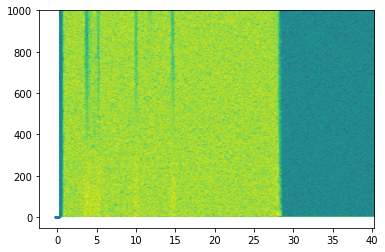

In [11]:
import matplotlib.pyplot as plt
import numpy as np

dt = 0.0005
# t = np.arange(0.0, 20.0, dt)
s1 = np.sin(2*np.pi*100*x_anc)
s2 = 2*np.sin(2*np.pi*400*x_anc)

# create a transient "chirp"
mask = np.where(np.logical_and(x_anc > 10, x_anc < 12), 1.0, 0.0)
s2 = s2 * mask

# add some noise into the mix
nse = 0.01*np.random.random(size=len(x_anc))

x = s1 + s2 + nse  # the signal
NFFT = 1024       # the length of the windowing segments
Fs = int(1.0/dt)  # the sampling frequency

# Pxx is the segments x freqs array of instantaneous power, freqs is
# the frequency vector, bins are the centers of the time bins in which
# the power is computed, and im is the matplotlib.image.AxesImage
# instance

# ax1 = plt.subplot(211)
plt.plot(x_anc, x)
# plt.subplot(212, sharex=ax1)
Pxx, freqs, bins, im = plt.specgram(x, NFFT=NFFT, Fs=Fs, noverlap=900)
plt.show()

In [202]:
from resemblyzer import VoiceEncoder, preprocess_wav
from pathlib import Path
import numpy as np
from scipy import spatial

fpath_orig = Path("Voices/levioza-origin.wav")
fpath_neg = Path("Voices/negative.wav")
fpath_pos = Path("Voices/positive.wav")
wav_orig = preprocess_wav(fpath_orig)
wav_neg = preprocess_wav(fpath_neg)
wav_pos = preprocess_wav(fpath_pos)

encoder = VoiceEncoder()
embed_orig = encoder.embed_utterance(wav_orig)
embed_pos = encoder.embed_utterance(wav_pos)
embed_neg = encoder.embed_utterance(wav_neg)
np.set_printoptions(precision=3, suppress=True)
print(spatial.distance.cosine(embed_orig, embed_pos), spatial.distance.cosine(embed_orig, embed_neg))

Loaded the voice encoder model on cpu in 0.30 seconds.
0.5248781442642212 0.6015658378601074


In [102]:
import hashlib
from operator import itemgetter
from typing import List, Tuple

import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage.filters import maximum_filter
from scipy.ndimage.morphology import (binary_erosion,
                                      generate_binary_structure,
                                      iterate_structure)

import librosa
from time import time
from typing import Dict

from hashlib import sha1
from typing import List, Tuple

import numpy as np
from pydub import AudioSegment
from pydub.utils import audioop

CONNECTIVITY_MASK = 2
DEFAULT_FS = 44100
DEFAULT_WINDOW_SIZE = 4096
DEFAULT_OVERLAP_RATIO = 0.5
DEFAULT_FAN_VALUE = 5  # 15 was the original value.
DEFAULT_AMP_MIN = 10
PEAK_NEIGHBORHOOD_SIZE = 10  # 20 was the original value.
MIN_HASH_TIME_DELTA = 0
MAX_HASH_TIME_DELTA = 200
PEAK_SORT = True
FINGERPRINT_REDUCTION = 20


In [187]:
def fingerprint(channel_samples: List[int],
                Fs: int = DEFAULT_FS,
                wsize: int = DEFAULT_WINDOW_SIZE,
                wratio: float = DEFAULT_OVERLAP_RATIO,
                fan_value: int = DEFAULT_FAN_VALUE,
                amp_min: int = DEFAULT_AMP_MIN) -> List[Tuple[str, int]]:
    """
    FFT the channel, log transform output, find local maxima, then return locally sensitive hashes.

    :param channel_samples: channel samples to fingerprint.
    :param Fs: audio sampling rate.
    :param wsize: FFT windows size.
    :param wratio: ratio by which each sequential window overlaps the last and the next window.
    :param fan_value: degree to which a fingerprint can be paired with its neighbors.
    :param amp_min: minimum amplitude in spectrogram in order to be considered a peak.
    :return: a list of hashes with their corresponding offsets.
    """
    # FFT the signal and extract frequency components
    arr2D = mlab.specgram(
        channel_samples,
        NFFT=wsize,
        Fs=Fs,
        window=mlab.window_hanning,
        noverlap=int(wsize * wratio))[0]
    # Apply log transform since specgram function returns linear array. 0s are excluded to avoid np warning.
    arr2D = 10 * np.log10(arr2D, out=np.zeros_like(arr2D), where=(arr2D != 0))
    
    print(arr2D.shape)
#     plt.specgram(arr2D, Fs = 1) 
#     plt.title('Spectrogram',  
#               fontsize = 14, fontweight ='bold') 

#     plt.show()

#     librosa.display.specshow(arr2D, sr=Fs, hop_length=512, x_axis='time', y_axis='mel');
#     plt.show()
    local_maxima = get_2D_peaks(arr2D, plot=True, amp_min=amp_min)
#     print(local_maxima)
    # return hashes
    return local_maxima
#     return generate_hashes(local_maxima, fan_value=fan_value)

In [188]:
def get_2D_peaks(arr2D: np.array, plot: bool = False, amp_min: int = DEFAULT_AMP_MIN)\
        -> List[Tuple[List[int], List[int]]]:
    """
    Extract maximum peaks from the spectogram matrix (arr2D).

    :param arr2D: matrix representing the spectogram.
    :param plot: for plotting the results.
    :param amp_min: minimum amplitude in spectrogram in order to be considered a peak.
    :return: a list composed by a list of frequencies and times.
    """
    # Original code from the repo is using a morphology mask that does not consider diagonal elements
    # as neighbors (basically a diamond figure) and then applies a dilation over it, so what I'm proposing
    # is to change from the current diamond figure to a just a normal square one:
    #       F   T   F           T   T   T
    #       T   T   T   ==>     T   T   T
    #       F   T   F           T   T   T
    # In my local tests time performance of the square mask was ~3 times faster
    # respect to the diamond one, without hurting accuracy of the predictions.
    # I've made now the mask shape configurable in order to allow both ways of find maximum peaks.
    # That being said, we generate the mask by using the following function
    # https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.generate_binary_structure.html
    struct = generate_binary_structure(2, CONNECTIVITY_MASK)

    #  And then we apply dilation using the following function
    #  http://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.iterate_structure.html
    #  Take into account that if PEAK_NEIGHBORHOOD_SIZE is 2 you can avoid the use of the scipy functions and just
    #  change it by the following code:
#     neighborhood = np.ones((PEAK_NEIGHBORHOOD_SIZE * 2 + 1, PEAK_NEIGHBORHOOD_SIZE * 2 + 1), dtype=bool)
    neighborhood = iterate_structure(struct, PEAK_NEIGHBORHOOD_SIZE)

    # find local maxima using our filter mask
    local_max = maximum_filter(arr2D, footprint=neighborhood) == arr2D

    # Applying erosion, the dejavu documentation does not talk about this step.
    background = (arr2D == 0)
    eroded_background = binary_erosion(background, structure=neighborhood, border_value=1)

    # Boolean mask of arr2D with True at peaks (applying XOR on both matrices).
    detected_peaks = local_max != eroded_background

    # extract peaks
    amps = arr2D[detected_peaks]
    freqs, times = np.where(detected_peaks)

    # filter peaks
    amps = amps.flatten()
    
#     print(amps)
    
    return amps

#     # get indices for frequency and time
#     filter_idxs = np.where(amps > amp_min)

#     freqs_filter = freqs[filter_idxs]
#     times_filter = times[filter_idxs]

# #     print(times_filter, len(times_filter), len(freqs_filter))
    
#     if plot:
#         # scatter of the peaks
#         fig, ax = plt.subplots()
#         ax.imshow(arr2D)
#         ax.scatter(times_filter, freqs_filter)
#         ax.set_xlabel('Time')
#         ax.set_ylabel('Frequency')
#         ax.set_title("Spectrogram")
#         plt.gca().invert_yaxis()
#         plt.xticks(range(1, 5))
#         plt.show()

#     return list(zip(freqs_filter, times_filter))

In [190]:
pos_amps = generate_fingerprints(channels_pos[1])
orig_amps = generate_fingerprints(channels_orig[1])

(2049, 128)
(2049, 78)


In [195]:
print(len(pos_amps[0]))

435


In [196]:
print(len(orig_amps[0]))

15009


In [226]:
print(spatial.distance.cosine(mfcc_anc.flatten()[:2600], mfcc_pos.flatten()))
print(spatial.distance.cosine(mfcc_anc.flatten()[:2600], mfcc_neg.flatten()))
# xsim_neg = librosa.segment.cross_similarity(orig_amps[0], neg_amps[0], metric='cosine')

0.37808549404144287
0.3678458333015442


array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [148]:
def generate_hashes(peaks: List[Tuple[int, int]], fan_value: int = DEFAULT_FAN_VALUE) -> List[Tuple[str, int]]:
    """
    Hash list structure:
       sha1_hash[0:FINGERPRINT_REDUCTION]    time_offset
        [(e05b341a9b77a51fd26, 32), ... ]

    :param peaks: list of peak frequencies and times.
    :param fan_value: degree to which a fingerprint can be paired with its neighbors.
    :return: a list of hashes with their corresponding offsets.
    """
    # frequencies are in the first position of the tuples
    idx_freq = 0
    # times are in the second position of the tuples
    idx_time = 1

    if PEAK_SORT:
        peaks.sort(key=itemgetter(1))

    hashes = []
    for i in range(len(peaks)):
        for j in range(1, fan_value):
            if (i + j) < len(peaks):

                freq1 = peaks[i][idx_freq]
                freq2 = peaks[i + j][idx_freq]
                t1 = peaks[i][idx_time]
                t2 = peaks[i + j][idx_time]
                t_delta = t2 - t1

                if MIN_HASH_TIME_DELTA <= t_delta <= MAX_HASH_TIME_DELTA:
                    h = hashlib.sha1(f"{str(freq1)}|{str(freq2)}|{str(t_delta)}".encode('utf-8'))

                    hashes.append((h.hexdigest()[0:FINGERPRINT_REDUCTION], t1))

    return hashes

In [149]:
def unique_hash(file_path: str, block_size: int = 2**20) -> str:
    """ Small function to generate a hash to uniquely generate
    a file. Inspired by MD5 version here:
    http://stackoverflow.com/a/1131255/712997

    Works with large files.

    :param file_path: path to file.
    :param block_size: read block size.
    :return: a hash in an hexagesimal string form.
    """
    s = sha1()
    with open(file_path, "rb") as f:
        while True:
            buf = f.read(block_size)
            if not buf:
                break
            s.update(buf)
    return s.hexdigest().upper()


In [150]:
def read(file_name: str, limit: int = None) -> Tuple[List[List[int]], int, str]:
    """
    Reads any file supported by pydub (ffmpeg) and returns the data contained
    within. If file reading fails due to input being a 24-bit wav file,
    wavio is used as a backup.

    Can be optionally limited to a certain amount of seconds from the start
    of the file by specifying the `limit` parameter. This is the amount of
    seconds from the start of the file.

    :param file_name: file to be read.
    :param limit: number of seconds to limit.
    :return: tuple list of (channels, sample_rate, content_file_hash).
    """
    # pydub does not support 24-bit wav files, use wavio when this occurs
    try:
        audiofile = AudioSegment.from_file(file_name)

        if limit:
            audiofile = audiofile[:limit * 1000]

        data = np.fromstring(audiofile.raw_data, np.int16)

        channels = []
        for chn in range(audiofile.channels):
            channels.append(data[chn::audiofile.channels])
        audiofile.frame_rate
    except audioop.error:
        _, _, audiofile = wavio.readwav(file_name)

        if limit:
            audiofile = audiofile[:limit * 1000]

        audiofile = audiofile.T
        audiofile = audiofile.astype(np.int16)

        channels = []
        for chn in audiofile:
            channels.append(chn)
#     print(len(channels))
    return channels, audiofile.frame_rate, unique_hash(file_name)

In [143]:
channels_orig, Fs_orig, _ = read('Voices/levioza-origin.wav')
channels_pos, Fs_pos, _ = read('Voices/positive.wav')
channels_neg, Fs_neg, _ = read('Voices/negative.wav')

<ipython-input-142-425f8d0429a9>:22: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  data = np.fromstring(audiofile.raw_data, np.int16)
<ipython-input-142-425f8d0429a9>:22: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  data = np.fromstring(audiofile.raw_data, np.int16)
<ipython-input-142-425f8d0429a9>:22: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  data = np.fromstring(audiofile.raw_data, np.int16)


In [144]:
def generate_fingerprints(samples: List[int], Fs=DEFAULT_FS) -> Tuple[List[Tuple[str, int]], float]:
    f"""
    Generate the fingerprints for the given sample data (channel).

    :param samples: list of ints which represents the channel info of the given audio file.
    :param Fs: sampling rate which defaults to {DEFAULT_FS}.
    :return: a list of tuples for hash and its corresponding offset, together with the generation time.
    """
    t = time()
    hashes = fingerprint(samples, Fs=Fs)
    fingerprint_time = time() - t
    return hashes, fingerprint_time

(2049, 78)
[0. 0. 0. ... 0. 0. 0.]


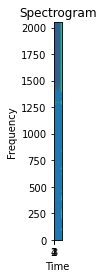

In [185]:
a = generate_fingerprints(channels_orig[0])

In [146]:
def _recognize(*data) -> Tuple[List[Dict[str, any]], int, int, int]:
    fingerprint_times = []
    hashes = set()  # to remove possible duplicated fingerprints we built a set.
    for channel in data:
        fingerprints, fingerprint_time = generate_fingerprints(channel)
        fingerprint_times.append(fingerprint_time)
        hashes |= set(fingerprints)
#     print(hashes)

#     matches, dedup_hashes, query_time = self.dejavu.find_matches(hashes)

#     t = time()
#     final_results = self.dejavu.align_matches(matches, dedup_hashes, len(hashes))
#     align_time = time() - t
    return None
#     return final_results, np.sum(fingerprint_times), query_time, align_time

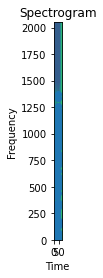

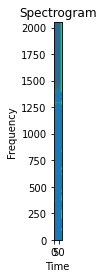

In [129]:
_recognize(*channels_orig)

In [90]:
_recognize(*channels_pos)

[]
[(6, 20), (6, 110), (8, 127), (9, 47), (9, 83), (22, 26), (22, 56), (23, 79), (46, 84), (56, 15), (56, 30), (56, 55), (83, 80), (101, 27), (105, 63), (114, 79), (117, 55), (138, 82), (146, 18), (146, 29), (156, 67), (171, 54), (179, 78), (184, 28), (198, 64), (214, 42), (214, 78), (218, 56), (235, 29), (258, 77), (284, 78), (305, 77), (325, 78), (342, 75), (1723, 78), (1743, 77), (1780, 77), (1833, 78), (1864, 28), (1872, 77), (1877, 54), (1902, 18), (1902, 29), (1904, 48), (1912, 81), (1940, 29), (1943, 63), (1965, 64), (1970, 26), (1970, 84), (1993, 31), (1993, 55), (2002, 84), (2025, 79), (2026, 26), (2026, 56)]


In [91]:
_recognize(*channels_neg)

[]
[(6, 32), (12, 125), (15, 46), (22, 20), (30, 110), (57, 58), (62, 21), (63, 40), (87, 46), (96, 20), (109, 40), (119, 58), (152, 21), (152, 47), (179, 28), (188, 40), (188, 72), (190, 56), (194, 19), (200, 72), (203, 55), (227, 55), (230, 40), (250, 55), (282, 39), (284, 68), (290, 28), (301, 71), (302, 55), (314, 39), (1746, 55), (1770, 55), (1798, 55), (1820, 56), (1858, 56), (1872, 57), (1896, 48), (1912, 48), (1946, 47), (1952, 20), (1960, 46), (1985, 40), (1986, 21), (1987, 59), (2011, 38), (2026, 20), (2028, 41), (2036, 125), (2041, 71), (2042, 31)]
